In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df['Class']

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [4]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [5]:
X = df.drop(['Class'], axis = 1).values
y = df["Class"].values

In [6]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

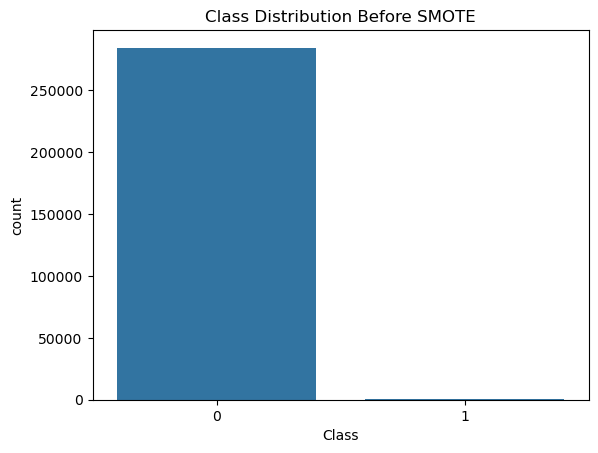

In [7]:
sns.countplot(x='Class', data=df)
plt.title('Class Distribution Before SMOTE')
plt.show()

##### Apply SMOTE

In [9]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

C:\Users\valla\anaconda3\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


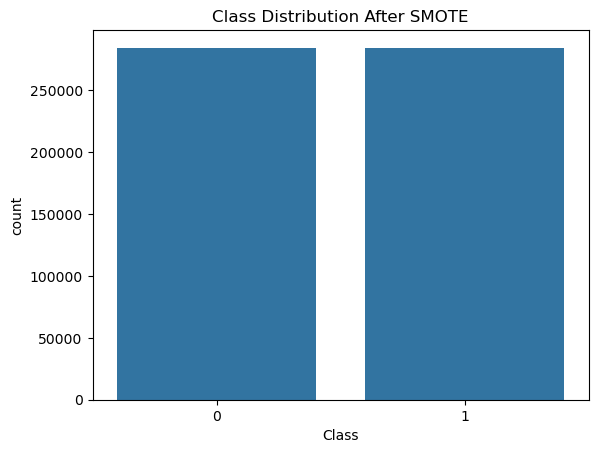

In [10]:
sns.countplot(x='Class', data=pd.DataFrame(y_resampled, columns=['Class']))
plt.title('Class Distribution After SMOTE')
plt.show()

#### Shuffle the data

In [12]:
# df_resampled = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled, columns=['Class'])], axis=1).sample(frac=1).reset_index(drop=True)
# X_shuffled = df_resampled.drop('Class', axis=1)
# y_shuffled = df_resampled['Class']

In [13]:
# X_train, X_test, y_train, y_test = train_test_split(X_shuffled, y_shuffled, test_size=0.2, random_state=42)

In [14]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [15]:

# model = DecisionTreeClassifier(random_state=42)
# model.fit(X_train, y_train)

In [16]:
# y_pred = model.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [18]:
# accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred)
# recall = recall_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred)
# conf_matrix = confusion_matrix(y_test, y_pred)

In [19]:
# print(f"Accuracy: {accuracy:.2f}")
# print(f"Precision: {precision:.2f}")
# print(f"Recall: {recall:.2f}")
# print(f"F1-score: {f1:.2f}")
# print(f"Confusion Matrix:\n{conf_matrix}")

In [20]:
# from sklearn.model_selection import cross_val_score
# cv_scores = cross_val_score(model, X_train, y_train, cv=5)
# print(f"Cross-validation scores: {cv_scores}")
# print(f"Average cross-validation score: {cv_scores.mean()}")

#### Undersampling

In [22]:
non_fraud = df[df['Class'] == 0].sample(n=y.sum(), random_state=42)  # Sample to match the number of frauds
fraud = df[df['Class'] == 1]
df_undersampled = pd.concat([non_fraud, fraud]).sample(frac=1).reset_index(drop=True)

In [23]:
X_undersampled = df_undersampled.drop('Class', axis=1)
y_undersampled = df_undersampled['Class']

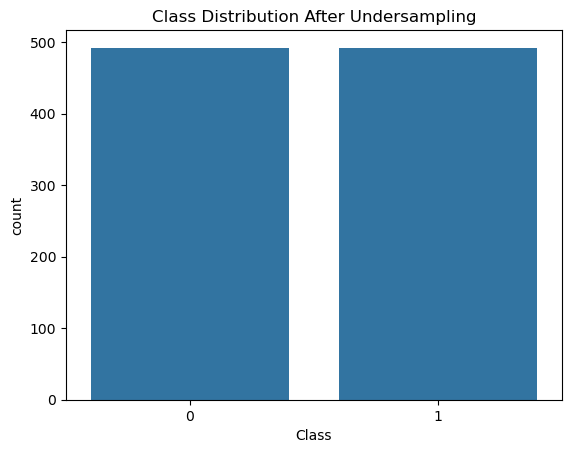

In [24]:
sns.countplot(x='Class', data=pd.DataFrame(y_undersampled, columns=['Class']))
plt.title('Class Distribution After Undersampling')
plt.show()

In [25]:
X_train_u, X_test_u, y_train_u, y_test_u = train_test_split(X_undersampled, y_undersampled, test_size=0.2, random_state=42)

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler_u = MinMaxScaler()
X_train_scaled_u = scaler_u.fit_transform(X_train_u)
X_test_scaled_u = scaler_u.transform(X_test_u)

In [27]:
model_u = DecisionTreeClassifier(random_state=42)
model_u.fit(X_train_scaled_u, y_train_u)

DecisionTreeClassifier(random_state=42)

In [29]:
y_pred_u = model_u.predict(X_test_scaled_u)
print("Predicted class distribution:", pd.Series(y_pred_u).value_counts())

Predicted class distribution: 0    103
1     94
Name: count, dtype: int64


In [31]:
accuracy_u = accuracy_score(y_test_u, y_pred_u)
precision_u = precision_score(y_test_u, y_pred_u)
recall_u = recall_score(y_test_u, y_pred_u)
f1_u = f1_score(y_test_u, y_pred_u)
conf_matrix_u = confusion_matrix(y_test_u, y_pred_u)

print(f"Accuracy: {accuracy_u:.2f}")
print(f"Precision: {precision_u:.2f}")
print(f"Recall: {recall_u:.2f}")
print(f"F1-score: {f1_u:.2f}")
print(f"Confusion Matrix:\n{conf_matrix_u}")

Accuracy: 0.92
Precision: 0.91
Recall: 0.92
F1-score: 0.92
Confusion Matrix:
[[96  8]
 [ 7 86]]


In [33]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best'],
    'max_depth': [10, 20, 30],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4]
}

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           verbose=2,    # Detailed output
                           error_score=0,
                           n_jobs=-1)

In [35]:
grid_search.fit(X_train_scaled_u, y_train_u)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, error_score=0,
             estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30], 'min_samples_leaf': [2, 4],
                         'min_samples_split': [5, 10], 'splitter': ['best']},
             scoring='accuracy', verbose=2)

In [36]:
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

Best parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5, 'splitter': 'best'}


In [37]:
model_u_improved = DecisionTreeClassifier(**best_params, random_state=42)
model_u_improved.fit(X_train_scaled_u, y_train_u)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=4,
                       min_samples_split=5, random_state=42)

In [41]:
y_pred_u = model_u_improved.predict(X_test_scaled_u)

In [43]:
accuracy_u = accuracy_score(y_test_u, y_pred_u)
precision_u = precision_score(y_test_u, y_pred_u, zero_division=0)
recall_u = recall_score(y_test_u, y_pred_u)
f1_u = f1_score(y_test_u, y_pred_u)
conf_matrix_u = confusion_matrix(y_test_u, y_pred_u)

print(f"Accuracy: {accuracy_u:.2f}")
print(f"Precision: {precision_u:.2f}")
print(f"Recall: {recall_u:.2f}")
print(f"F1-score: {f1_u:.2f}")
print(f"Confusion Matrix:\n{conf_matrix_u}")

Accuracy: 0.91
Precision: 0.90
Recall: 0.92
F1-score: 0.91
Confusion Matrix:
[[94 10]
 [ 7 86]]


In [45]:
print("Predicted class distribution:", pd.Series(y_pred_u).value_counts())

Predicted class distribution: 0    101
1     96
Name: count, dtype: int64


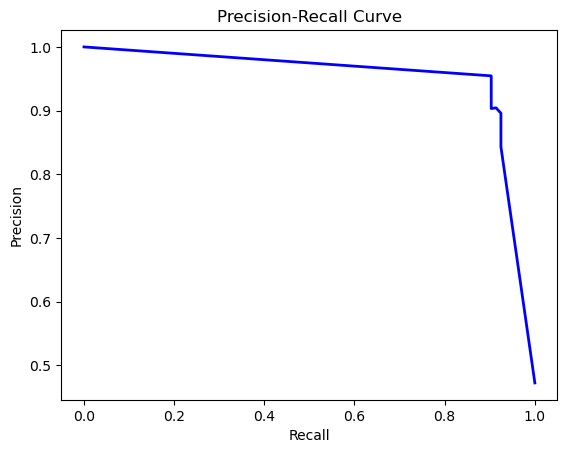

In [47]:
from sklearn.metrics import precision_recall_curve

# Calculate Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test_u, model_u_improved.predict_proba(X_test_scaled_u)[:,1])

plt.figure()
plt.plot(recall, precision, color='b', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [49]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model_u_improved, X_train_scaled_u, y_train_u, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Average cross-validation score: {cv_scores.mean()}")

Cross-validation scores: [0.93037975 0.89873418 0.92356688 0.89808917 0.91719745]
Average cross-validation score: 0.9135934854470692


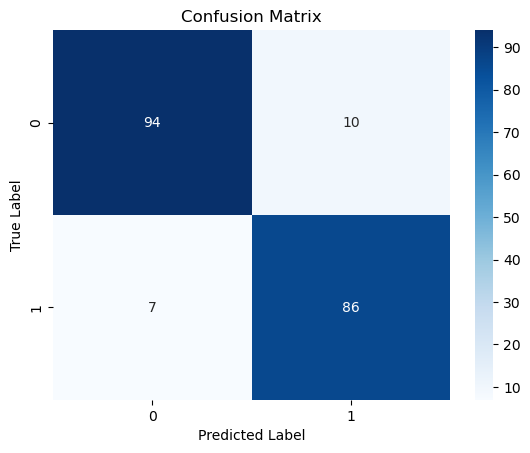

In [51]:
import seaborn as sns

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_u, y_pred_u)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()